# Script de Exploración

En este script se busca mostrar los analisis y visualizaciones necesarias y adicionales que sirvieron en la exploración, limpieza y modificación de los datos ante cualquier anomalia, outliers o features adicionales necesarios para el modelo

**DATASETS:**
1. UH_2023_TRAIN
2. ETO
3. METEO

**Librerías necesarias:**

In [2]:
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [3]:
from tools import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from time import time

**Extración de datos:**

In [4]:
data_eto = pd.read_csv('data/DATOS_ETO.TXT',sep='|') 
data_meteo = pd.read_csv('data/DATOS_METEO.TXT',sep='|') 
data = pd.read_csv('data/UH_2023_TRAIN.txt',sep='|') 

# 1. UH_2023_TRAIN

In [5]:
# Filtramos los datos de TEST
test_filter = np.isnan(data.PRODUCCION)
test_set = data[test_filter]
train_set = data[test_filter == False]
print("Tipos de datos: \n",train_set.dtypes)
print("\nDATASET de entrenamiento")
train_set

Tipos de datos: 
 CAMPAÑA          int64
ID_FINCA         int64
ID_ZONA          int64
ID_ESTACION      int64
ALTITUD         object
VARIEDAD         int64
MODO             int64
TIPO             int64
COLOR            int64
SUPERFICIE     float64
PRODUCCION     float64
dtype: object

DATASET de entrenamiento


,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,76953,515,4,660,26,2,0,1,0.000,22215.0
1,14,84318,515,4,660,26,2,0,1,0.000,22215.0
2,14,85579,340,4,520,32,2,0,1,0.000,20978.0
3,14,69671,340,4,520,32,2,0,1,0.000,40722.0
4,14,14001,852,14,NaN,81,1,0,1,0.000,14126.0
...,...,...,...,...,...,...,...,...,...,...,...
8521,21,37461,239,6,700,52,2,0,1,3.680,28160.1
8522,21,58769,239,6,700,32,2,0,1,4.250,41310.0
8523,21,58769,239,6,700,59,2,0,1,4.160,45420.0
8524,21,88928,239,6,700,40,2,0,1,4.750,56140.0


In [6]:
print("Cantidad de grupos totales para los features categoricos")
get_columns(train_set, cat_only=True)

Cantidad de grupos totales para los features categoricos


{'ALTITUD': 84}

In [7]:
print("Cantidad de grupos totales para los features numéricos")
get_columns(train_set, num_only=True)

Cantidad de grupos totales para los features numéricos


{'CAMPAÑA': 8,
 'ID_FINCA': 1193,
 'ID_ZONA': 124,
 'ID_ESTACION': 20,
 'VARIEDAD': 25,
 'MODO': 2,
 'TIPO': 2,
 'COLOR': 2,
 'SUPERFICIE': 1010,
 'PRODUCCION': 6287}

In [8]:
print("Porcentaje de datos en zero por feature")
features_zero = get_features_zero(train_set)
features_zero

Porcentaje de datos en zero por feature


{'ID_ESTACION': 0.02345765892563922,
 'TIPO': 98.8036593947924,
 'COLOR': 15.177105324888576,
 'SUPERFICIE': 76.34295097349283}

In [9]:
print("Porcentaje de datos en nan por feature")
features_null = get_features_nans(train_set)
features_null

Porcentaje de datos en nan por feature


{'ALTITUD': 0.5747126436781609}

Distribución de los datos por cada feature


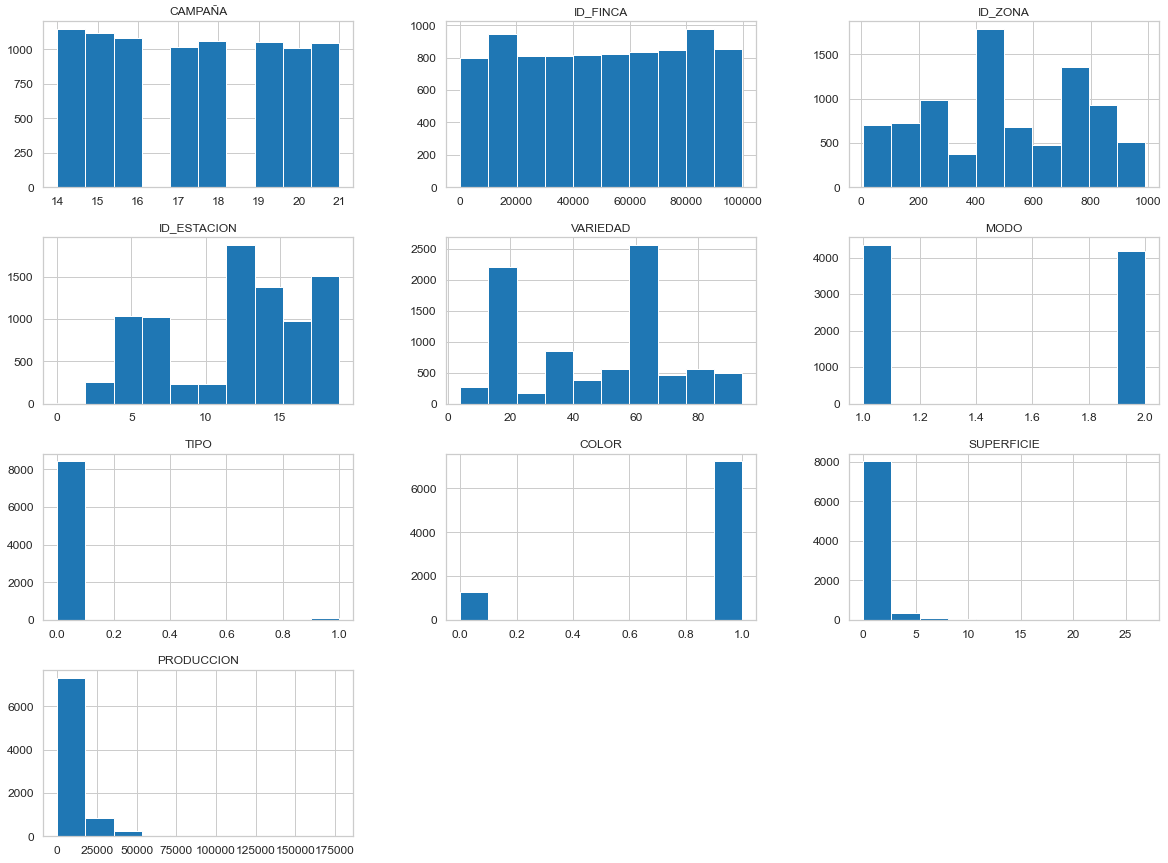

In [10]:
print("Distribución de los datos por cada feature")
train_set.hist(bins=10, figsize=(20,15))
plt.show()

In [11]:
print("Columnas de los datos de entrenamiento")
train_set.columns

Columnas de los datos de entrenamiento


Index(['CAMPAÑA', 'ID_FINCA', 'ID_ZONA', 'ID_ESTACION', 'ALTITUD', 'VARIEDAD',
       'MODO', 'TIPO', 'COLOR', 'SUPERFICIE', 'PRODUCCION'],
      dtype='object')

####  CAMPAÑA 

Observaciones:
* La producción por campaña es elevada; sin embargo, los datos de media y desviación no relejan lo mismo por lo que es la cantidad lo que impacta
* No se ve una regresión or producción constante en el totalizado por CAMPAÑA
* Se debe profundizar más en las variables
* Se puede observar que existe una caída de la producción en el 2017

In [12]:
var = 'CAMPAÑA'

In [13]:
train_set[var]

0       14
1       14
2       14
3       14
4       14
        ..
8521    21
8522    21
8523    21
8524    21
8525    21
Name: CAMPAÑA, Length: 8526, dtype: int64

In [14]:
train_set[var].describe()

count    8526.000000
mean       17.423411
std         2.307338
min        14.000000
25%        15.000000
50%        17.000000
75%        19.000000
max        21.000000
Name: CAMPAÑA, dtype: float64

<AxesSubplot:>

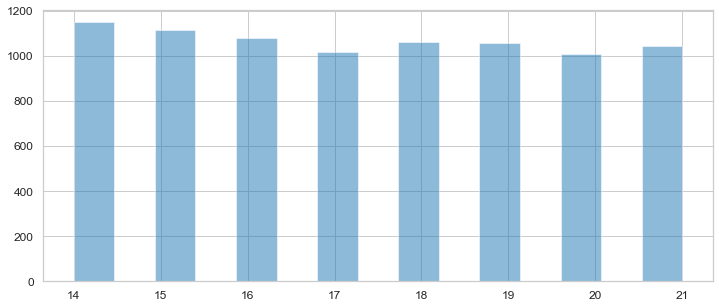

In [15]:
train_set[var].hist(histtype='stepfilled', alpha=.5, bins=15)

In [16]:
skewness(train_set, var)

0.03989901853790108

In [17]:
pearson(train_set, var)

2.930855692545291

In [18]:
train_set[var].sort_values().value_counts(sort=False)

14    1148
15    1116
16    1079
17    1017
18    1061
19    1055
20    1006
21    1044
Name: CAMPAÑA, dtype: int64

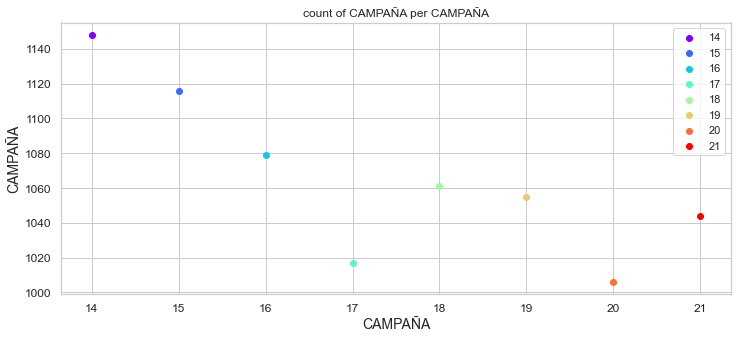

In [19]:
visualize_per_catagory(
    train_set,
    'CAMPAÑA',
    [var],
    f'count of CAMPAÑA per {var}'
)

#### PRODUCCION

In [20]:
print("Cálculo de la distribución de produccion por campaña")
data.groupby([var]).PRODUCCION.describe()

Cálculo de la distribución de produccion por campaña


,count,mean,std,min,25%,50%,75%,max
CAMPAÑA,,,,,,,,
14,1148.0,8010.711320,11727.253556,5.600,1487.97500,4013.000,10117.000000,127190.000
15,1116.0,9820.923642,14521.286565,10.000,1975.45000,4900.300,11736.250000,157560.000
16,1079.0,9619.273472,13857.596377,48.015,2100.50000,5144.025,11292.200000,151500.000
17,1017.0,7655.192248,11606.219437,3.375,1534.38000,3580.000,8870.000000,127920.000
18,1061.0,10169.741401,14805.360271,3.940,2281.01300,5224.032,12060.000000,177520.000
19,1055.0,8865.556955,11918.497698,1.590,2125.35750,4656.000,10827.400000,103870.000
20,1006.0,9592.824246,13430.472920,1.360,2033.47425,4671.835,11745.000000,130950.000
21,1044.0,9964.510281,13648.332205,0.718,2050.48750,4927.500,11829.253725,124620.262
22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


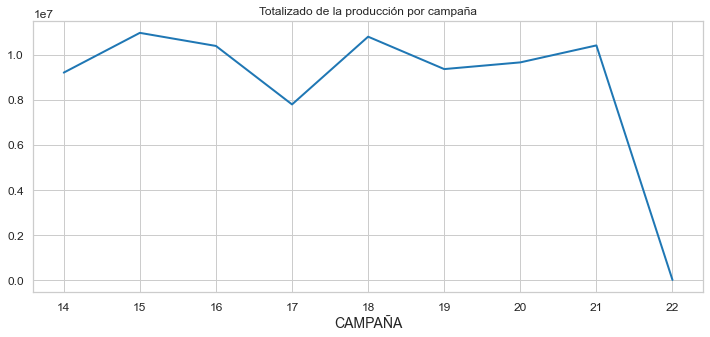

In [21]:
data.groupby([var]).PRODUCCION.sum().plot()
plt.title("Totalizado de la producción por campaña")
plt.show()

In [22]:
var = 'PRODUCCION'

In [23]:
train_set[var]

0       22215.0
1       22215.0
2       20978.0
3       40722.0
4       14126.0
         ...   
8521    28160.1
8522    41310.0
8523    45420.0
8524    56140.0
8525    13869.9
Name: PRODUCCION, Length: 8526, dtype: float64

In [24]:
train_set[var].describe()

count      8526.000000
mean       9209.190958
std       13268.812623
min           0.718000
25%        1940.000000
50%        4620.000000
75%       11137.500000
max      177520.000000
Name: PRODUCCION, dtype: float64

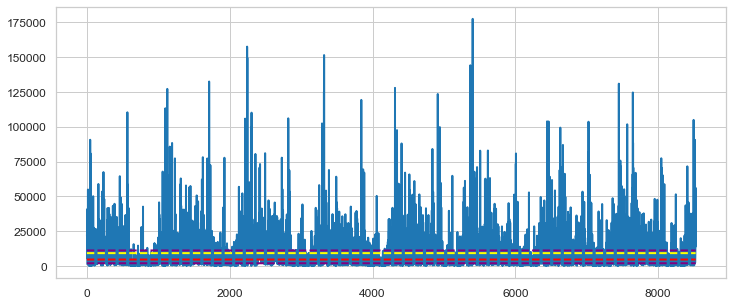

{'25': 1940.0,
 '50': 4620.0,
 '75': 11137.5,
 'mean': 9209.190958174995,
 'std': 13268.81262295171,
 'count': 8526,
 'cut_off': ''}

In [25]:
show_data_distribution(train_set, var)

<AxesSubplot:>

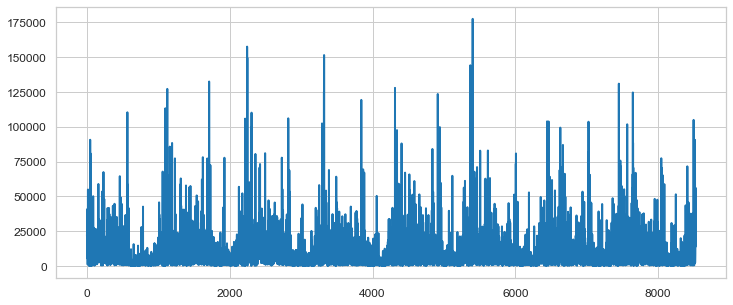

In [26]:
train_set[var].plot()

<AxesSubplot:>

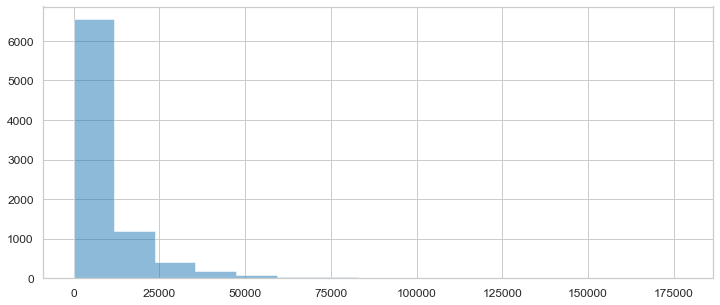

In [27]:
train_set[var].hist(histtype='stepfilled', alpha=.5, bins=15)

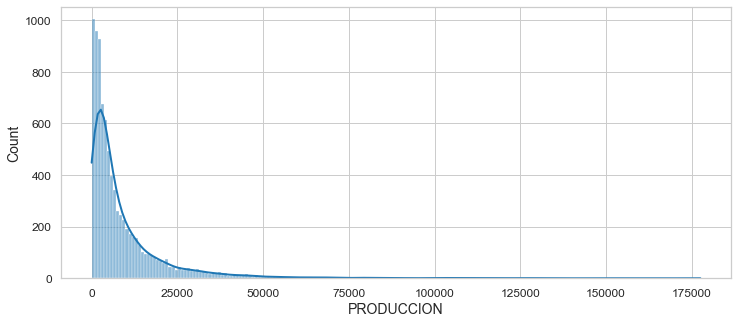

In [28]:
sns.histplot(train_set[var], fill=True, kde=True)
plt.show()

In [29]:
skewness(train_set, var)

3.9724891152129445

In [30]:
pearson(train_set, var)

182679344.74490467

#### MODO

Observaciones
* Punto de inflexión de la cantidad de filas por cada tipo de MODO a partir de la campaña 17-18

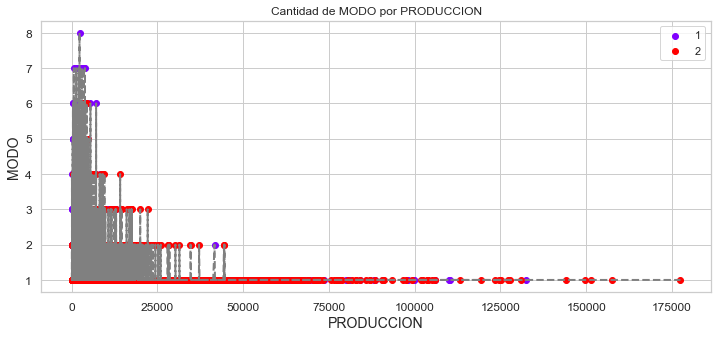

In [31]:
visualize_per_catagory(
    train_set,
    'MODO',
    [var],
    f'Cantidad de MODO por {var}'
)

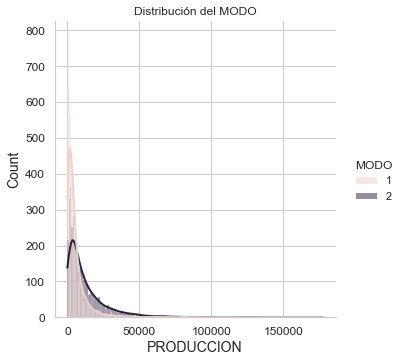

In [32]:
sns.displot(train_set, x=var, hue="MODO", fill=True, kde=True)
plt.title("Distribución del MODO")
plt.show()

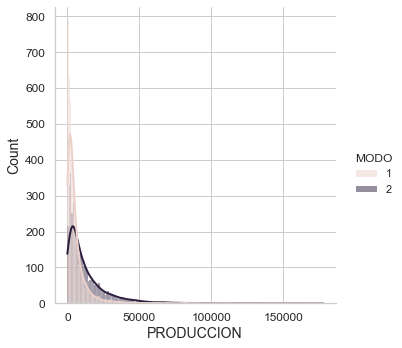

In [33]:
sns.displot(train_set, x=var, hue="MODO", fill=True, kde=True)

#### TIPO

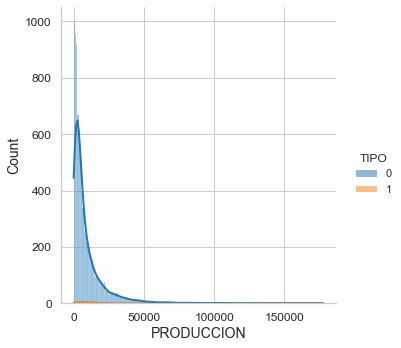

In [34]:
sns.displot(train_set, x=var, hue="TIPO", fill=True, kde=True)

#### COLOR

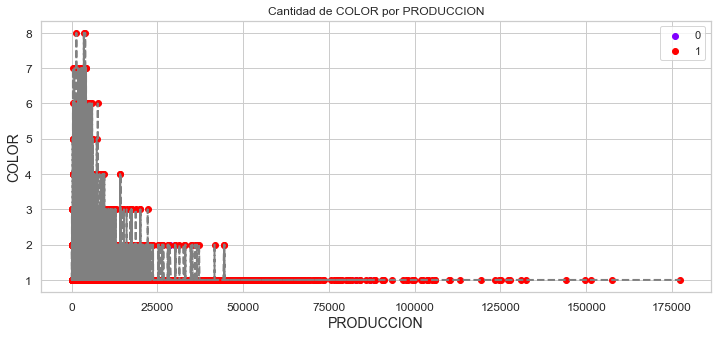

In [35]:
visualize_per_catagory(
    train_set,
    'COLOR',
    [var],
    f'Cantidad de COLOR por {var}'
)

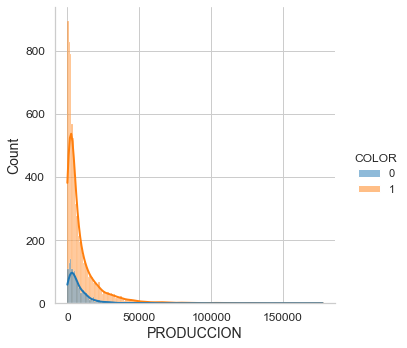

In [36]:
sns.displot(train_set, x=var, hue="COLOR", fill=True, kde=True)

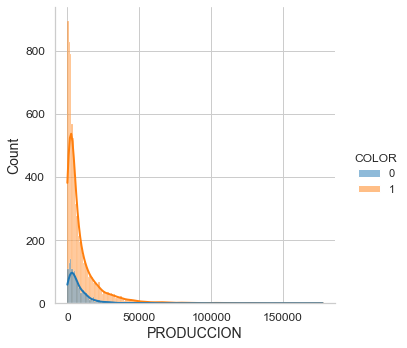

In [37]:
sns.displot(train_set, x=var, hue="COLOR", fill=True, kde=True)

#### ID_FINCA

Observaciones
* Existen 1231 FINCAS
* Las Fincas pueden aparecer en varias CAMPAÑAS (max 9)
* Las Fincas con mayor cantidad de registros se debe a la VARIEDAD de la uva
* Se ha hecho un ranking con las FINCAS con mayor producción y en las últimas 4 CAMPAÑAS

In [38]:
var = 'ID_FINCA'

In [39]:
train_set[var]

0       76953
1       84318
2       85579
3       69671
4       14001
        ...  
8521    37461
8522    58769
8523    58769
8524    88928
8525    88928
Name: ID_FINCA, Length: 8526, dtype: int64

In [40]:
train_set[var].describe()

count     8526.000000
mean     50668.724255
std      28976.960098
min        200.000000
25%      25026.000000
50%      50799.000000
75%      75832.000000
max      99693.000000
Name: ID_FINCA, dtype: float64

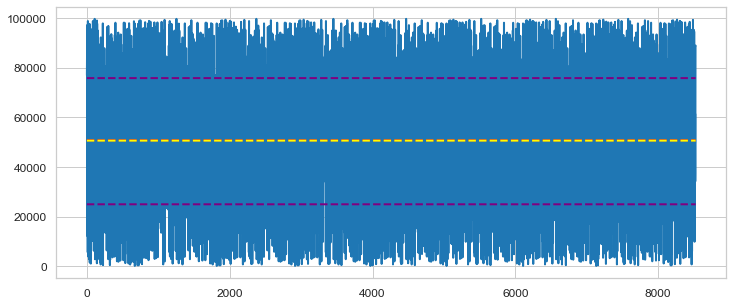

{'25': 25026.0,
 '50': 50799.0,
 '75': 75832.0,
 'mean': 50668.72425521933,
 'std': 28976.960098126438,
 'count': 8526,
 'cut_off': ''}

In [41]:
show_data_distribution(train_set, var)

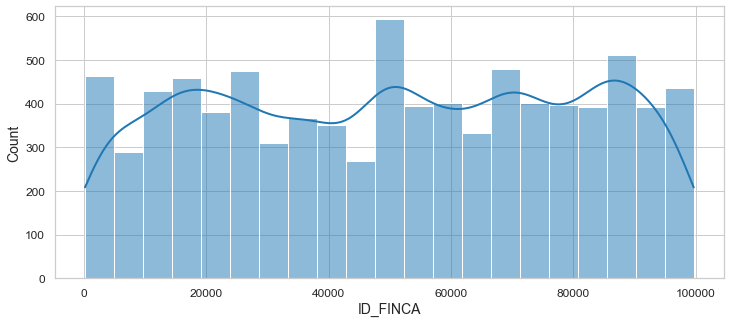

In [42]:
sns.histplot(train_set[var], fill=True, kde=True)
plt.show()

In [43]:
skewness(train_set, var)

-0.03977604604367936

In [44]:
pearson(train_set, var)

-11324985.174789755

In [45]:
print("Ejemplo con una de las fincas con mayor cantidad de registros")
train_set[train_set.ID_FINCA==49636][::5] #La variedad es la diferencia

Ejemplo con una de las fincas con mayor cantidad de registros


,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
1121,14,49636,473,10,450-480,87,1,0,0,0.0000,11280.0
1126,14,49636,473,10,450-480,59,2,0,1,0.0000,127190.0
2244,15,49636,473,10,450-480,17,2,0,1,0.0000,157560.0
3318,16,49636,473,10,450-480,68,1,0,0,0.0000,14100.0
3323,16,49636,473,10,450-480,81,2,0,1,0.0000,3470.0
4343,17,49636,473,10,450-480,59,2,0,1,0.0000,97570.0
5403,18,49636,473,10,450-480,59,2,0,1,0.0000,177520.0
6466,19,49636,473,10,450-480,59,2,0,1,0.0000,103800.0
7473,20,49636,473,10,450-480,59,2,0,1,20.8122,71760.0
8515,21,49636,473,10,450-480,52,2,0,1,7.3696,36630.0


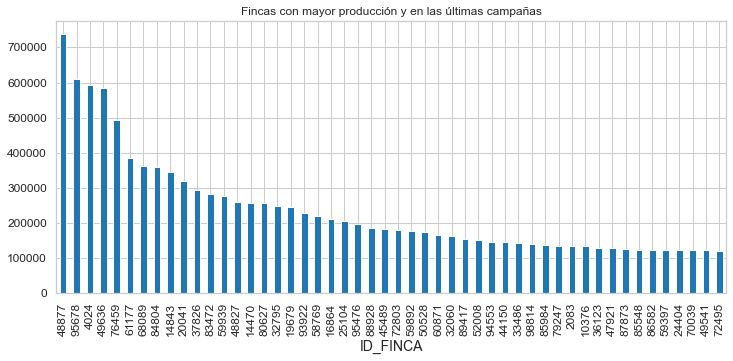

In [46]:
data[data.CAMPAÑA.isin([22,21,20,19])].groupby(["ID_FINCA"]).PRODUCCION.sum().sort_values(ascending=False).head(50).plot(kind='bar')
plt.title("Fincas con mayor producción y en las últimas campañas")
plt.show()

#### SUPERFICIE

Observaciones
* Superficies en 0 desde la campaña 14 hasta la 19
* Existen 1212 SUPERFICIES
* Las SUPERFICIES estan en hectareas y dependen de cada FINCA y VARIEDAD; sin embargo, por CAMPAÑA pueden variar como no
* La SUPERFICIE no varia a nivel CAMPAÑA, ID_FINCA, VARIEDAD, MODO
* Hay una correlación entre la PRODUCCION y SUPERFICIE (73%)

In [47]:
var = 'SUPERFICIE'

In [48]:
print("Número de SUPERFICIES únicas")
train_set.SUPERFICIE.nunique()

Número de SUPERFICIES únicas


1010

In [49]:
train_set[var]

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
8521    3.680
8522    4.250
8523    4.160
8524    4.750
8525    1.462
Name: SUPERFICIE, Length: 8526, dtype: float64

In [50]:
train_set[var].describe()

count    8526.000000
mean        0.517420
std         1.572784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.850000
Name: SUPERFICIE, dtype: float64

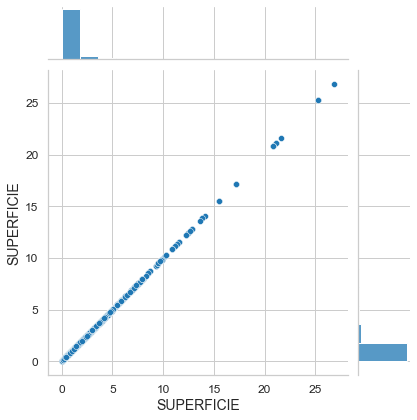

In [51]:
sns.jointplot(data=train_set, x=var, y="SUPERFICIE")

<AxesSubplot:>

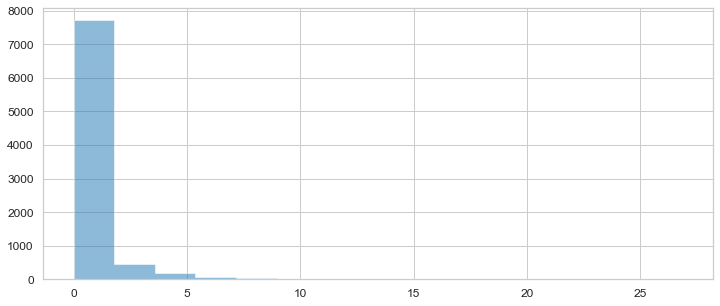

In [52]:
train_set[var].hist(histtype='stepfilled', alpha=.5, bins=15)

In [53]:
skewness(train_set, var)

6.136684637524454

In [54]:
pearson(train_set, var)

2.4413715792300668

<AxesSubplot:xlabel='VARIEDAD', ylabel='SUPERFICIE'>

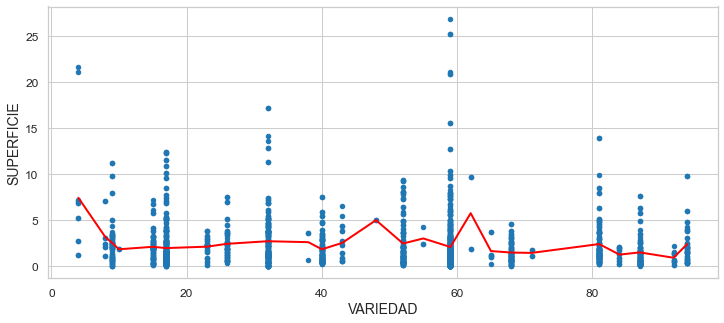

In [55]:
df = train_set[(train_set.CAMPAÑA>19) & (train_set.CAMPAÑA<22)]
df.plot(kind='scatter',x='VARIEDAD', y='SUPERFICIE')
df.groupby(["VARIEDAD"]).SUPERFICIE.mean().plot(color="red")

#### ID_ZONA

Observaciones
* Existen 125 ZONAS
* Las ZONAS pueden aparecer en varias CAMPAÑAS (max 9)
* Cada FINCA pertenece a una única ZONA
* Se ha hecho un ranking con las ZONAS con mayor producción en las últimas 4 CAMPAÑAS
* La cantidad de registros de una ZONA en una CAMPAÑA se debe a que puede existir varias FINCAS asociadas con diferentes VARIEDADES de uva

In [56]:
var = 'ID_ZONA'

In [57]:
train_set[var]

0       515
1       515
2       340
3       340
4       852
       ... 
8521    239
8522    239
8523    239
8524    239
8525    239
Name: ID_ZONA, Length: 8526, dtype: int64

In [58]:
train_set[var].describe()

count    8526.000000
mean      498.126906
std       260.885775
min         7.000000
25%       284.000000
50%       464.000000
75%       726.000000
max       990.000000
Name: ID_ZONA, dtype: float64

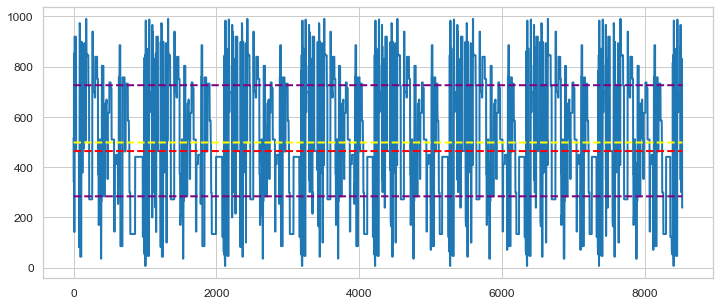

{'25': 284.0,
 '50': 464.0,
 '75': 726.0,
 'mean': 498.1269059347877,
 'std': 260.8857753193175,
 'count': 8526,
 'cut_off': ''}

In [59]:
show_data_distribution(train_set, var)

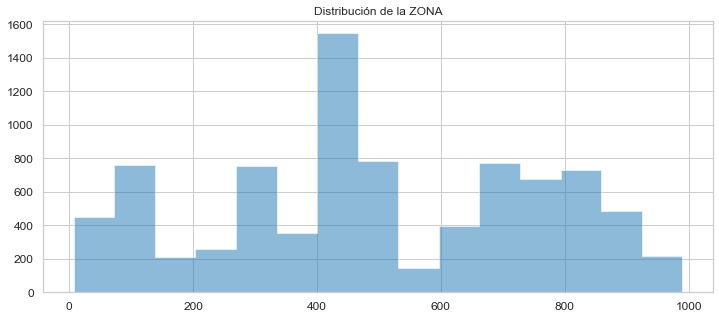

In [60]:
train_set[var].hist(histtype='stepfilled', alpha=.5, bins=15)
plt.title("Distribución de la ZONA")
plt.show()

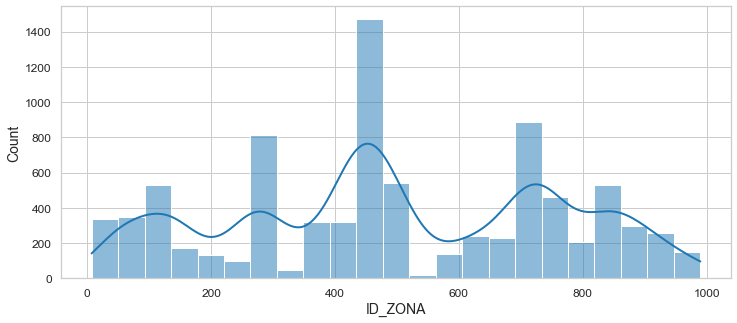

In [61]:
sns.histplot(train_set[var], fill=True, kde=True)
plt.show()

In [62]:
skewness(train_set, var)

-0.04743222977749204

In [63]:
pearson(train_set, var)

26709.67294213953

In [64]:
train_set.ID_ZONA.nunique()

124

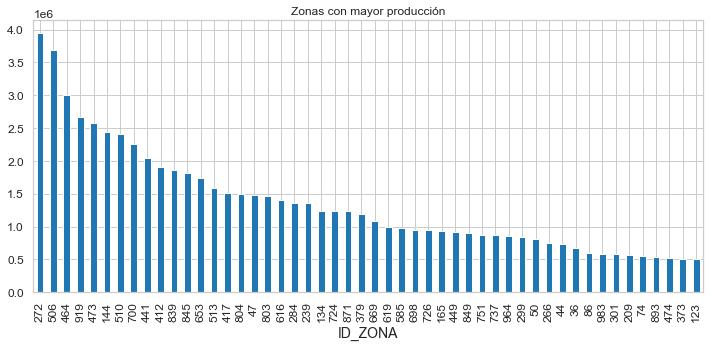

In [65]:
train_set.groupby(["ID_ZONA"]).PRODUCCION.sum().sort_values(ascending=False).head(50).plot(kind='bar')
plt.title("Zonas con mayor producción")
plt.show()

#### ID_ESTACION

Observaciones
* Existen 20 ESTACIONES
* Cada FINCA esta asociada a una sola ESTACION
* Cada ESTACION puede estar en varias ZONAS

In [66]:
var = 'ID_ESTACION'

In [67]:
print("Número de estaciones unicas")
train_set.ID_ESTACION.nunique()

Número de estaciones unicas


20

In [68]:
train_set[var]

0        4
1        4
2        4
3        4
4       14
        ..
8521     6
8522     6
8523     6
8524     6
8525     6
Name: ID_ESTACION, Length: 8526, dtype: int64

In [69]:
print("Número de fincas unicas por estación")
train_set.groupby(["ID_ESTACION"]).ID_FINCA.nunique().sort_values(ascending=False)

Número de fincas unicas por estación


ID_ESTACION
12    339
7     134
15    125
5     120
16    115
19    103
18     90
14     60
3      30
9      23
10     18
8      13
6       4
4       4
17      4
2       4
11      2
13      2
0       2
1       1
Name: ID_FINCA, dtype: int64

In [70]:
train_set[var].describe()

count    8526.000000
mean       12.155172
std         4.755262
min         0.000000
25%         7.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: ID_ESTACION, dtype: float64

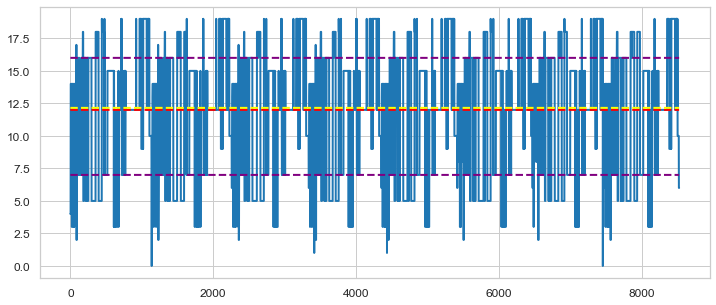

{'25': 7.0,
 '50': 12.0,
 '75': 16.0,
 'mean': 12.155172413793103,
 'std': 4.75526202622012,
 'count': 8526,
 'cut_off': ''}

In [71]:
show_data_distribution(train_set, var)

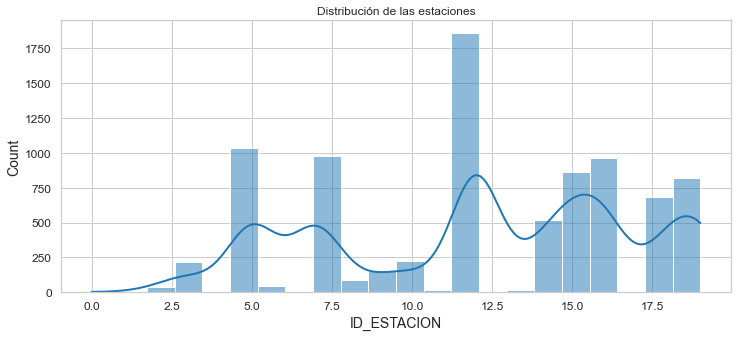

In [72]:
sns.histplot(train_set[var], fill=True, kde=True)
plt.title("Distribución de las estaciones")
plt.show()

In [73]:
skewness(train_set, var)

-0.2990435703466778

In [74]:
pearson(train_set, var)

2.2136564604817766

#### Análisis del COLOR por ID_ESTACION

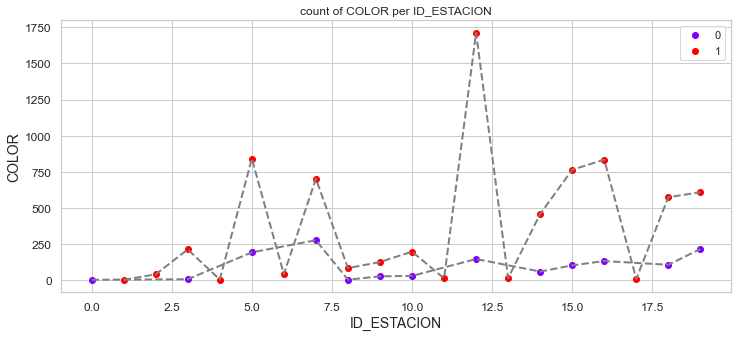

In [75]:
visualize_per_catagory(
    train_set,
    'COLOR',
    [var],
    f'count of COLOR per {var}'
)

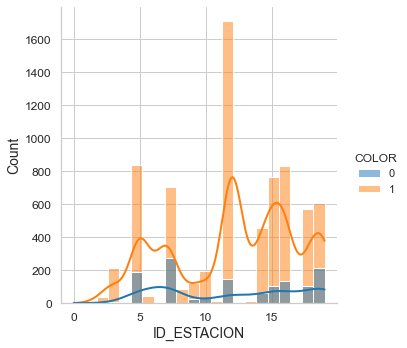

In [76]:
sns.displot(train_set, x=var, hue="COLOR", fill=True, kde=True)

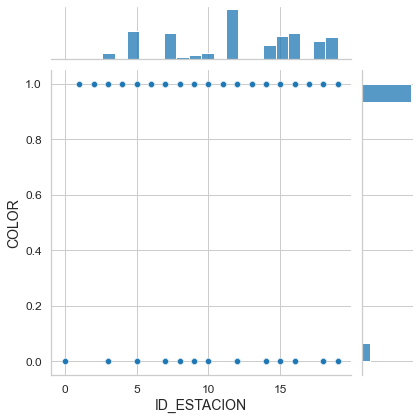

In [77]:
sns.jointplot(data=train_set, x=var, y="COLOR")

<AxesSubplot:xlabel='ID_ESTACION', ylabel='COLOR'>

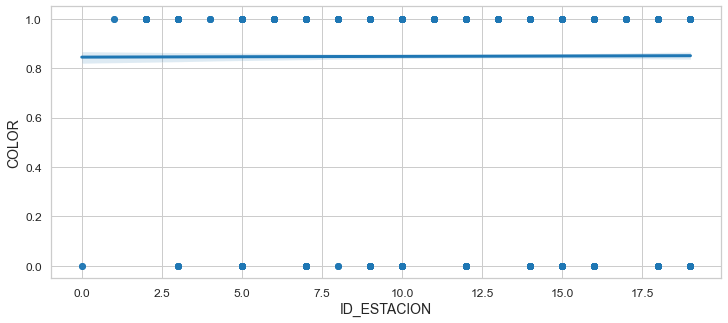

In [78]:
sns.regplot(data=train_set, x=var, y='COLOR')

#### ALTITUD

In [79]:
var = 'ALTITUD'

In [80]:
train_set[var]

0       660
1       660
2       520
3       520
4       NaN
       ... 
8521    700
8522    700
8523    700
8524    700
8525    700
Name: ALTITUD, Length: 8526, dtype: object

In [81]:
train_set[var].describe()

count        8477
unique         83
top       455-470
freq          639
Name: ALTITUD, dtype: object

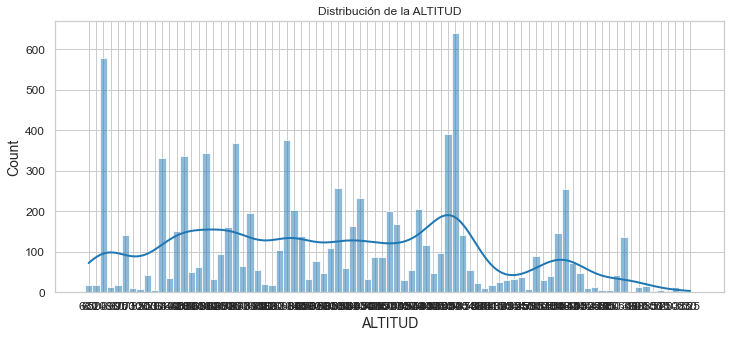

In [82]:
sns.histplot(train_set[var], fill=True, kde=True)
plt.title("Distribución de la ALTITUD")
plt.show()

#### VARIEDAD

Observaciones
* Existen 25 variedades de uva
* La mayor producción es la variedad 59 (ver ranking)
* Cada ZONA puede producir diferentes VARIEDADES

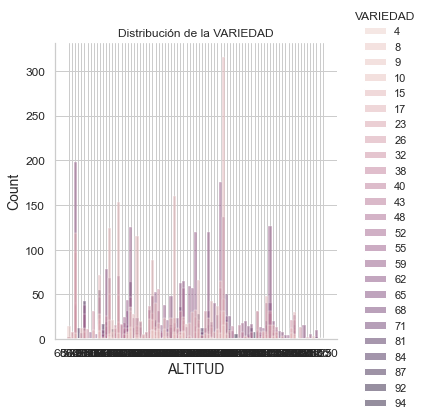

In [83]:
sns.displot(train_set, x=var, hue="VARIEDAD", fill=True, kde=False)
plt.title("Distribución de la VARIEDAD")
plt.show()

In [84]:
var = 'VARIEDAD'

In [85]:
train_set[var]

0       26
1       26
2       32
3       32
4       81
        ..
8521    52
8522    32
8523    59
8524    40
8525    52
Name: VARIEDAD, Length: 8526, dtype: int64

In [86]:
train_set[var].nunique()

25

In [87]:
train_set[var].describe()

count    8526.000000
mean       45.450739
std        23.699281
min         4.000000
25%        17.000000
50%        52.000000
75%        59.000000
max        94.000000
Name: VARIEDAD, dtype: float64

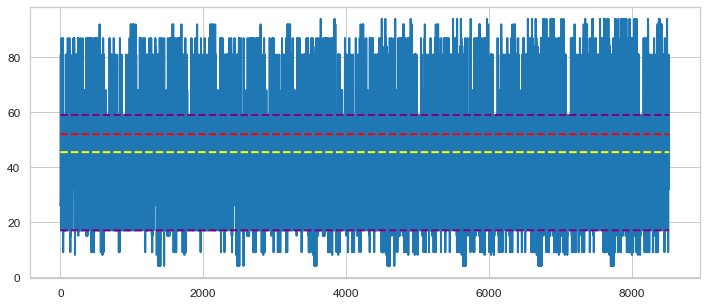

{'25': 17.0,
 '50': 52.0,
 '75': 59.0,
 'mean': 45.45073891625616,
 'std': 23.699281230287628,
 'count': 8526,
 'cut_off': ''}

In [88]:
show_data_distribution(train_set, var)

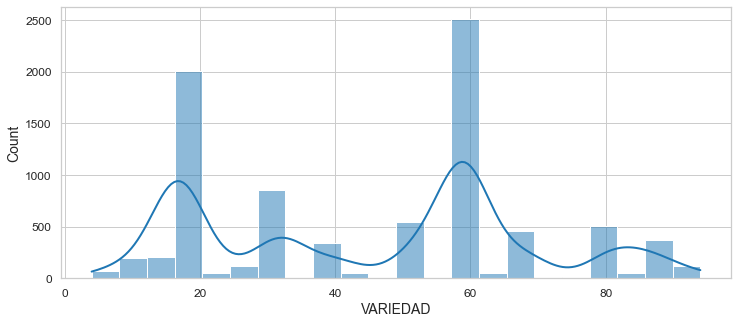

In [89]:
sns.histplot(train_set[var], fill=True, kde=True)
plt.show()

In [90]:
skewness(train_set, var)

0.06703604393996772

In [91]:
pearson(train_set, var)

-465.638340822671

<AxesSubplot:xlabel='ID_ZONA'>

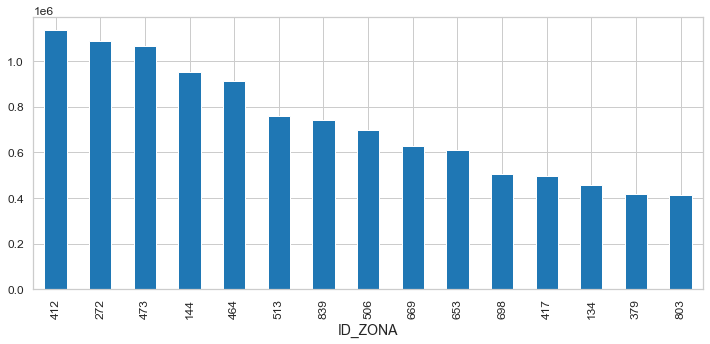

In [92]:
# Producción por zona en la variedad con mayor producción
train_set[train_set.VARIEDAD==59].groupby(["ID_ZONA"]).PRODUCCION.sum().sort_values(ascending=False).head(15).plot(kind='bar')

#### Análisis del MODO por VARIEDAD

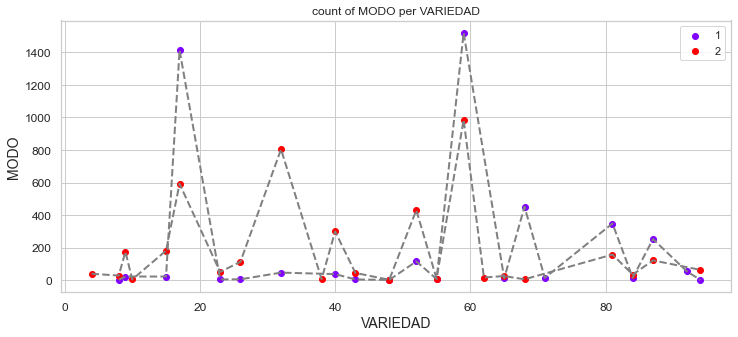

In [93]:
visualize_per_catagory(
    train_set,
    'MODO',
    [var],
    f'count of MODO per {var}'
)

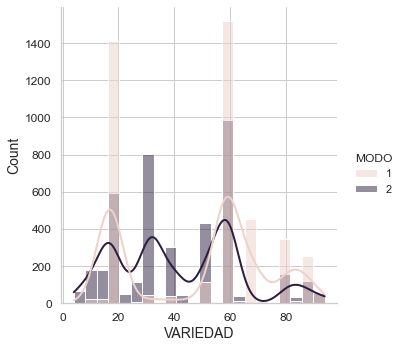

In [94]:
sns.displot(train_set, x=var, hue="MODO", fill=True, kde=True)

#### Análisis del TIPO por VARIEDAD

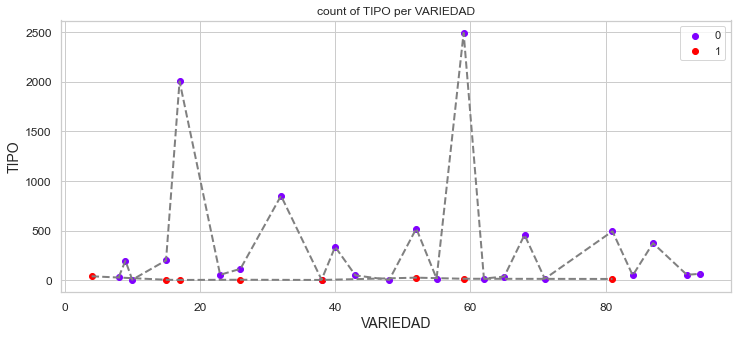

In [95]:
visualize_per_catagory(
    train_set,
    'TIPO',
    [var],
    f'count of TIPO per {var}'
)

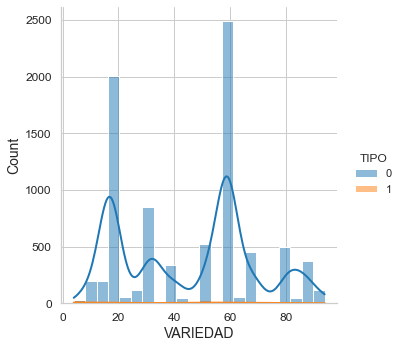

In [96]:
sns.displot(train_set, x=var, hue="TIPO", fill=True, kde=True)

#### Análisis del MODO, TIPO y COLOR

Observaciones
* Cada VARIEDAD tiene un solo COLOR
* MODO: Mayor producción del tipo 2
* TIPO: Mayor producción del modo 0
* COLOR: Mayor producción del color 1

In [97]:
print("Cantidad de MODO, TIPO, COLOR únicos por VARIEDAD:")
m = train_set.groupby(["VARIEDAD"]).MODO.nunique().sort_values(ascending=False)
t = train_set.groupby(["VARIEDAD"]).TIPO.nunique().sort_values(ascending=False)
c = train_set.groupby(["VARIEDAD"]).COLOR.nunique().sort_values(ascending=False)
p = train_set.groupby(["VARIEDAD"]).PRODUCCION.sum().sort_values(ascending=False)
d = {'MODO':m,'TIPO': t,'COLOR':c, 'PROD': p}
df = pd.DataFrame(data=d)
df.sort_values(by='PROD',ascending=False)

Cantidad de MODO, TIPO, COLOR únicos por VARIEDAD:


,MODO,TIPO,COLOR,PROD
VARIEDAD,,,,
59,2,2,1,2.010760e+07
17,2,2,1,1.563358e+07
32,2,1,1,1.310240e+07
52,2,2,1,5.606190e+06
81,2,2,1,4.764683e+06
87,2,1,1,3.496942e+06
40,2,1,1,3.399111e+06
68,2,1,1,2.777023e+06
15,2,2,1,2.191920e+06


# 2. ETO

Observaciones
* Se analizó con profundidad las variables ETO considerando que es un reflejo del dataset METEO pero a nivel de día
* Se ha creado diferentes DataFrames por CAMPAÑA y ESTACION para analizar el comportamiento de los features metereológicos
* Lo que se busca con este dataset es encontrar mediante un modelo simple (Laso regression) encontrar las variables de ETO con mayor relación entre los distintos DataFrames por CAMPAÑA y ESTACION
* Se realizó una agregación a nivel mes asi como también se agrupo por etapas de acuerdo al ciclo de la uva (CRECIMIENTO, REPOSO)
* Finalmente, despupes de encontrar los coeficientes con mayor relación, se valido los features con mayor presencia y correlación entre los diferentes DataFrames para ser evaluados dentro del modelo

#### Calculo de la altura media para el dataset TRAIN

In [98]:
range_total_alt = np.array(data[data.ALTITUD.isna()==False].ALTITUD.unique())
range_total_alt=sorted(range_total_alt,reverse=True)
range_alt = np.array(data[(data.ALTITUD.str.len()==7)].ALTITUD.unique())
range_alt=sorted(range_alt,reverse=True)

# Crear un Diccionario con solo los valores por rango de ALTITUD
dic_alt={}
for r in range_alt:
    dic_alt[r]=""

# Crear un Diccionario con todos los valores únicos de ALTITUD
dic_total_alt={}
for r in range_total_alt:
    dic_total_alt[r]=""
    
# Encontrar rangos más grandes para incluir los más pequeños
for r in range_alt:
    lower_li=int(r[:3])
    upper_li=int(r[4:])
    for ra in range_alt:
        if r!=ra:
            lower_li_comp=int(ra[:3])
            upper_li_comp=int(ra[4:])
            if (lower_li>=lower_li_comp) & (upper_li<upper_li_comp):
                dic_alt[r]=ra
    if dic_alt[r]=="":
        dic_alt[r]=r
        
# Encontrar los rangos para todos los valores de ALTITUD
for r in range_total_alt:
    if len(r)==3:
        n = int(r)
        for ra in dic_alt:
            lower_li_comp=int(ra[:3])
            upper_li_comp=int(ra[4:])
            if (n>=lower_li_comp) & (n<upper_li_comp):
                dic_total_alt[r]=dic_alt[ra]
        if dic_total_alt[r]=="":
            dic_total_alt[r]=r
    else:
        dic_total_alt[r]=dic_alt[r]
        
# Calcular ALTITUD media con todos los registros
altitud_sum = 0
total = len(data[data.ALTITUD.isna()==False].ALTITUD)
for a in data[data.ALTITUD.isna()==False].ALTITUD:
    if len(a)!=3:
        lower_li=int(a[:3])
        upper_li=int(a[4:])
        altitud_sum+=(lower_li+upper_li)//2
    else:
        altitud_sum+=int(a)
altitud_media=altitud_sum//total


# Completar los valores en Na
data.ALTITUD.fillna(altitud_media,inplace=True)
dic_total_alt[altitud_media]=altitud_media

# Calculo de la columna MALTITUD
data['MALTITUD'] = pd.Series(data=np.zeros(len(data)).astype(int))

for index in data[data.ALTITUD.isna()==False].index:
    curr_alt = str(data.loc[index].ALTITUD)
    if len(curr_alt)!=3:
        lower_li=int(curr_alt[:3])
        upper_li=int(curr_alt[4:])
        data.loc[index, 'MALTITUD'] = (lower_li+upper_li)//2
    else:
        data.loc[index, 'MALTITUD'] = int(curr_alt)

#### Se seleccionó ciertos features con menor número de NaNs y mayor correlación

In [99]:
variables = ["Dewpoint", "FeelsLike", "PrecipAmount", "RelativeHumidity", "SnowAmount", "Temperature", "UVIndex", "Visibility", "WindSpeed"]
#evaporization, GlobalHorizontalIrradiance, Gust, MLSP variables are excluded since they are missing from 33% to 87%
token = "LocalDay"
agregations = ["Min","Avg","Max"]

def dayColumnGenerator(variables, token, agregations):
    allcolumns = []
    for variable in variables:
        for agregation in agregations:
             allcolumns.append(variable+token+agregation)
    return allcolumns
        
new_columns = dayColumnGenerator(variables, token, agregations)
new_columns.insert(0, 'date')
new_columns.insert(1, 'ID_ESTACION')

new_columns
data_eto_reduced_day = data_eto[new_columns]
data_eto_reduced_day

,date,ID_ESTACION,DewpointLocalDayMin,DewpointLocalDayAvg,DewpointLocalDayMax,FeelsLikeLocalDayMin,FeelsLikeLocalDayAvg,FeelsLikeLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDayMax,RelativeHumidityLocalDayMin,RelativeHumidityLocalDayAvg,RelativeHumidityLocalDayMax,SnowAmountLocalDayMin,SnowAmountLocalDayAvg,SnowAmountLocalDayMax,TemperatureLocalDayMin,TemperatureLocalDayAvg,TemperatureLocalDayMax,UVIndexLocalDayMin,UVIndexLocalDayAvg,UVIndexLocalDayMax,VisibilityLocalDayMin,VisibilityLocalDayAvg,VisibilityLocalDayMax,WindSpeedLocalDayMin,WindSpeedLocalDayAvg,WindSpeedLocalDayMax
0,20150629,13,285.4,286.0,287.0,298.6,304.1,307.6,0.0,0.0,0.0,26.3,34.3,47.1,0,0.0,0.0,298.6,304.1,307.6,0,0.5,2,16093,16093.0,16093,2.3,4.0,5.2
1,20150630,13,282.5,284.3,286.5,289.6,299.2,309.0,0.0,0.0,0.0,20.1,43.6,69.7,0,0.0,0.0,289.6,299.2,309.0,0,2.5,9,16093,16093.0,16093,1.1,3.3,5.9
2,20150701,13,283.8,285.8,288.0,290.8,298.3,305.9,0.0,0.0,0.0,28.9,48.1,66.1,0,0.0,0.0,290.8,298.3,305.9,0,2.7,10,16093,16093.0,16093,1.2,3.6,6.5
3,20150702,13,286.1,288.3,291.8,293.2,297.6,303.8,0.0,0.0,0.0,43.5,58.5,77.6,0,0.0,0.0,293.2,297.2,302.9,0,2.3,8,16093,16093.0,16093,1.2,3.0,5.4
4,20150703,13,287.8,290.5,293.0,292.6,298.2,305.1,0.0,0.0,0.0,39.1,67.5,98.7,0,0.0,0.0,292.6,297.8,304.2,0,2.6,10,16093,16093.0,16093,2.3,4.2,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51175,20220626,8,283.0,285.0,288.0,287.0,296.0,304.0,0.0,0.0,0.0,26.4,55.3,81.4,0,0.0,0.0,287.0,296.0,304.0,0,2.5,9,12514,13359.0,14454,1.0,2.5,5.2
51176,20220627,8,286.0,288.0,290.0,289.0,294.0,298.0,0.0,0.0,0.6,55.9,72.8,90.9,0,0.0,0.0,289.0,294.0,298.0,0,2.4,9,8046,12205.0,13950,0.6,3.0,5.0
51177,20220628,8,282.0,286.0,290.0,287.0,295.0,303.0,0.0,0.0,0.0,27.1,62.4,100.0,0,0.0,0.0,287.0,295.0,303.0,0,2.5,9,8046,11275.0,14599,1.2,2.7,5.0
51178,20220629,8,282.0,285.0,288.0,288.0,297.0,304.0,0.0,0.0,0.0,25.4,53.1,81.8,0,0.0,0.0,288.0,297.0,304.0,0,2.5,9,12221,13425.0,14639,1.0,3.0,5.9


#### Se crea diferentes DataFrames por CAMPAÑA y ESTACION para analizar el comportamiento de lso features de ETO

In [100]:
data_eto_reduced_day['ID_ESTACION'] = pd.Categorical(data_eto_reduced_day.ID_ESTACION)
data_eto_reduced_day = data_eto_reduced_day.drop(['FeelsLikeLocalDayMax', 'FeelsLikeLocalDayMin', 'FeelsLikeLocalDayAvg'], axis=1)

data_eto_reduced_day["Año"] = (data_eto_reduced_day["date"].apply(str)).str[2:4]
data_eto_reduced_day["CAMPAÑA"] = data_eto_reduced_day["Año"] 
data_eto_reduced_day["CAMPAÑA"] = data_eto_reduced_day["CAMPAÑA"].astype(int)

#create month column
data_eto_reduced_day["Mes"] = (data_eto_reduced_day["date"].apply(str)).str[4:6].apply(int)

# Create a variable that counts the days without rain until that day 
data_eto_reduced_day['date'] = pd.to_datetime(data_eto_reduced_day['date'], format='%Y%m%d')

data_eto_reduced_day['consecutive_days_without_rain'] = data_eto_reduced_day.groupby((data_eto_reduced_day['PrecipAmountLocalDayAvg'] != 0).cumsum()).cumcount()

#Create a variable for daily difference btw max and min temperatures:

data_eto_reduced_day['TemperatureDifferenceLocalDayAvg']  = data_eto_reduced_day['TemperatureLocalDayMax'] - data_eto_reduced_day['TemperatureLocalDayMin']

# create  a variable for temperature fluctuation for a month:
for station in data_eto_reduced_day["ID_ESTACION"].unique():
    for year in data_eto_reduced_day["CAMPAÑA"].unique():
        for month in data_eto_reduced_day["Mes"].unique():
            month_data = data_eto_reduced_day[(data_eto_reduced_day["ID_ESTACION"] == station) &(data_eto_reduced_day['CAMPAÑA'] == year) & (data_eto_reduced_day['Mes'] == month)]
            monthly_temp_variance = month_data["TemperatureLocalDayAvg"].std()
            data_eto_reduced_day.loc[(data_eto_reduced_day["ID_ESTACION"] == station) & (data_eto_reduced_day["CAMPAÑA"] == year) & (data_eto_reduced_day["Mes"] == month), "Temperature_Variance_month"] = monthly_temp_variance
        
# create number of days with temperature under zero
for station in data_eto_reduced_day["ID_ESTACION"].unique():
    for year in data_eto_reduced_day["CAMPAÑA"].unique():
        for month in data_eto_reduced_day["Mes"].unique():
            month_data = data_eto_reduced_day[(data_eto_reduced_day["ID_ESTACION"] == station) &(data_eto_reduced_day['CAMPAÑA'] == year) & (data_eto_reduced_day['Mes'] == month)]
            num_frozen_days = (month_data["TemperatureLocalDayAvg"] <= 273).sum()
            data_eto_reduced_day.loc[(data_eto_reduced_day["ID_ESTACION"] == station) & (data_eto_reduced_day["CAMPAÑA"] == year) & (data_eto_reduced_day["Mes"] == month), "Frozen_Days_month"] = num_frozen_days
            


C:\Users\Anderson\AppData\Local\Temp\ipykernel_10276\155639630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eto_reduced_day['ID_ESTACION'] = pd.Categorical(data_eto_reduced_day.ID_ESTACION)


In [101]:
# create a variable of the timing of the Bud break, when average temp reaches 15 for the first time
import datetime

for station in data_eto_reduced_day["ID_ESTACION"].unique():
    for year in data_eto_reduced_day["CAMPAÑA"].unique():
        year_data = data_eto_reduced_day[(data_eto_reduced_day["ID_ESTACION"] == station) &(data_eto_reduced_day['CAMPAÑA'] == year)]
        days_over_10 = year_data[year_data["TemperatureLocalDayAvg"] >= 288]
        budbreak_date = days_over_10.iloc[0]['date']
        new_year = pd.Timestamp('20'+str(year)+'-01-01')
        budbreak_timing = budbreak_date - new_year
        #print(str(year)+'-01-01')
        #print("Year:"+str(year)+" Station:"+str(station)+" Date: "+str(budbreak_date)+" Timing: "+str(delta))
        data_eto_reduced_day.loc[(data_eto_reduced_day["ID_ESTACION"] == station) & (data_eto_reduced_day["CAMPAÑA"] == year), "BudBreakTiming_Year"] = budbreak_timing

In [102]:
data_eto_reduced_day["BudBreakTiming_Year"] = data_eto_reduced_day["BudBreakTiming_Year"].astype(str)
data_eto_reduced_day["BudBreakTiming_Year"] = [ int(b[:-5]) for b in data_eto_reduced_day.BudBreakTiming_Year]

#### Agregación a nivel mes

In [103]:
data_eto_reduced_day["Rain_month"] = data_eto_reduced_day.groupby(["ID_ESTACION", "CAMPAÑA", "Mes"])['PrecipAmountLocalDayAvg'].transform('mean')

# create number of "rainy days of the month" and "rain amount per rainy day" variables.
for station in data_eto_reduced_day["ID_ESTACION"].unique():
    for year in data_eto_reduced_day["CAMPAÑA"].unique():
        for month in data_eto_reduced_day["Mes"].unique():
            month_data = data_eto_reduced_day[(data_eto_reduced_day["ID_ESTACION"] == station) &(data_eto_reduced_day['CAMPAÑA'] == year) & (data_eto_reduced_day['Mes'] == month)]
            num_rainy_days = (month_data['PrecipAmountLocalDayAvg'] != 0).sum()
            percentage_rainy_days = num_rainy_days/month_data.shape[0]
            data_eto_reduced_day.loc[(data_eto_reduced_day["ID_ESTACION"] == station) & (data_eto_reduced_day["CAMPAÑA"] == year) & (data_eto_reduced_day["Mes"] == month), "Rainy_Days_month"] = percentage_rainy_days
            average_rain_on_a_rainy_day = month_data['PrecipAmountLocalDayAvg'].sum() * month_data.shape[0] / num_rainy_days
            data_eto_reduced_day.loc[(data_eto_reduced_day["ID_ESTACION"] == station) & (data_eto_reduced_day["CAMPAÑA"] == year) & (data_eto_reduced_day["Mes"] == month), "Precipt_on_rainy_day_month"] = average_rain_on_a_rainy_day
            
for variable in data_eto_reduced_day.columns:
    if "Avg" in variable:
        data_eto_reduced_day[variable +"_month"] = data_eto_reduced_day.groupby(["ID_ESTACION", "CAMPAÑA", "Mes"])[variable].transform('mean')
    if "Min" in variable:
        data_eto_reduced_day[variable +"_month"] = data_eto_reduced_day.groupby(["ID_ESTACION", "CAMPAÑA", "Mes"])[variable].transform('min')
    if "Max" in variable:
        data_eto_reduced_day[variable +"_month"] = data_eto_reduced_day.groupby(["ID_ESTACION", "CAMPAÑA", "Mes"])[variable].transform('max')                                                                         
    if "consecutive" in variable:
        data_eto_reduced_day[variable+ "_month"] = data_eto_reduced_day.groupby(["ID_ESTACION", "CAMPAÑA", "Mes"])[variable].transform('max')      

        
data_eto_reduced_day["Precipt_on_rainy_day_month"] = data_eto_reduced_day["Precipt_on_rainy_day_month"].fillna(0)


pivot_dfs_array = []

count=0
for variable in data_eto_reduced_day.columns:
    if "month" in variable:
        count+=1
        pivot_table = pd.pivot_table(data_eto_reduced_day, values=variable, index=["ID_ESTACION", "CAMPAÑA"],columns=["Mes"])
        new_pivot = pivot_table.reset_index()
        variable = variable[:-5]
        if "LocalDay" in variable:
            variable = variable.replace("LocalDay","")
        new_pivot.columns = ["ID_ESTACION", "CAMPAÑA", variable+"Jan", variable+"Feb",variable+"Mar",variable+"Abr", variable+"May", variable+"Jun", variable+"Jul",variable+"Aug", variable+"Sep", variable+"Oct", variable+"Nov", variable+"Dec"]
        pivot_dfs_array.append(new_pivot)
        
n=0
new_df = pivot_dfs_array[n]
for n in range(1, len(pivot_dfs_array)):
    new_df = pd.merge(new_df, pivot_dfs_array[n], on=["ID_ESTACION", "CAMPAÑA"])


eto_monthly = new_df #this is the data frame that has monthly averages, minimums and maximums for each ID_Estacion. 
#To be joined with the main data set, on ID_Estacion and CAMPAÑA


BudBreakTiming_Year_df = data_eto_reduced_day.groupby(['ID_ESTACION', 'CAMPAÑA'])['BudBreakTiming_Year'].mean().reset_index(name='BudBreakTiming_Year')

eto_monthly = pd.merge(BudBreakTiming_Year_df[['ID_ESTACION', 'CAMPAÑA', 'BudBreakTiming_Year']], eto_monthly, on=['ID_ESTACION', 'CAMPAÑA'], how='inner')


def delete_columns_by_name(df, string_to_delete):
    columns_to_delete = []
    for var in df.columns:
        if string_to_delete in var:
            columns_to_delete.append(var)
    return df.drop(columns_to_delete, axis=1)

eto_monthly = delete_columns_by_name(eto_monthly, 'Jul')
eto_monthly = delete_columns_by_name(eto_monthly, 'Aug')
eto_monthly = delete_columns_by_name(eto_monthly, 'Sep')
eto_monthly = delete_columns_by_name(eto_monthly, 'Oct')
eto_monthly = delete_columns_by_name(eto_monthly, 'Nov')
eto_monthly = delete_columns_by_name(eto_monthly, 'Dec')

C:\Users\Anderson\AppData\Local\Temp\ipykernel_10276\1370788693.py:11: RuntimeWarning: invalid value encountered in double_scalars
  average_rain_on_a_rainy_day = month_data['PrecipAmountLocalDayAvg'].sum() * month_data.shape[0] / num_rainy_days
C:\Users\Anderson\AppData\Local\Temp\ipykernel_10276\1370788693.py:11: RuntimeWarning: invalid value encountered in double_scalars
  average_rain_on_a_rainy_day = month_data['PrecipAmountLocalDayAvg'].sum() * month_data.shape[0] / num_rainy_days
C:\Users\Anderson\AppData\Local\Temp\ipykernel_10276\1370788693.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  percentage_rainy_days = num_rainy_days/month_data.shape[0]


#### Calculo de la altura media para el dataset TRAIN

In [104]:
data['ALTITUD_CAT'] = round(data['MALTITUD'] / 50)


agri_constant = data.groupby(['VARIEDAD', 'ALTITUD_CAT', 'MODO'])['PRODUCCION'].count()
agri_constant = agri_constant[agri_constant>100]

data = pd.merge(data, eto_monthly, how="left", on=['CAMPAÑA', 'ID_ESTACION'])

data = data[data['CAMPAÑA'] > 15]

for val in eto_monthly:
    val = val[:-3]
    if "Min" in val:
        data[val+'Reposo'] = data[[val+'Jan', val+'Feb']].min(axis=1)
    if "Avg" in val:
        data[val+'Reposo'] = data[[val+'Jan', val+'Feb']].mean(axis=1)
    if "Max" in val:
        data[val+'Reposo'] = data[[val+'Jan', val+'Feb']].max(axis=1)
    if "Rain" in val or "rain" in val:
        data[val+'Reposo'] = data[[val+'Jan', val+'Feb']].mean(axis=1)
    if "consecutive" in val:
        data[val+'Reposo'] = data[[val+'Jan', val+'Feb']].max(axis=1)
    if "Variance" in val:
        data[val+'Reposo'] = data[[val+'Jan', val+'Feb']].max(axis=1)
    if "Frozen" in val:
        data[val+'Reposo'] = data[[val+'Jan', val+'Feb']].max(axis=1)
                
for val in eto_monthly:
    val = val[:-3]
    if "Min" in val:
        data[val+'Crecimiento'] = data[[val+'Abr', val+'May', val+'Jun']].mean(axis=1)
    if "Avg" in val:
        data[val+'Crecimiento'] = data[[val+'Abr', val+'May', val+'Jun']].mean(axis=1)
    if "Max" in val:
        data[val+'Crecimiento'] = data[[val+'Abr', val+'May', val+'Jun']].mean(axis=1)
    if "Rain" in val or "rain" in val:
        data[val+'Crecimiento'] = data[[val+'Abr', val+'May', val+'Jun']].mean(axis=1)
    if "consecutive" in val:
        data[val+'Crecimiento'] = data[[val+'Abr', val+'May', val+'Jun']].max(axis=1)
    if "Variance" in val:
        data[val+'Crecimiento'] = data[[val+'Abr', val+'May', val+'Jun']].max(axis=1)
    if "Frozen" in val:
        data[val+'Crecimiento'] = data[[val+'Abr', val+'May', val+'Jun']].max(axis=1)
        
        
# data = data.drop(['PRODUCCION_ANT'], axis = 1)
# data = data.drop(['VAR_PRODUCCION'], axis = 1)
# data = data.drop(['VAR_PRODUCCION_PORC'], axis = 1)
# data = data.drop(['SUPERFICIE_MEAN'], axis = 1)
# data = data.drop(['SUPERFICIE_ACTUAL'], axis = 1)
# data = data.drop(['SUPERFICIE_ANT'], axis = 1)
# data = data.drop(['VAR_SUPERFICIE'], axis = 1)

# data = data.drop(['PRODUCCION_MEAN'], axis = 1)

data_before_22 = data[data['CAMPAÑA']<22]

agri_constant = data_before_22.groupby(['VARIEDAD', 'ALTITUD_CAT', 'MODO'])['PRODUCCION'].count()
agri_constant = agri_constant[agri_constant>100]
pd.set_option('display.max_rows', 50)
agri_constant.head(100)

agri_constant_dfs = []
for modo in data_before_22['MODO'].unique():
    for variedad in data_before_22['VARIEDAD'].unique():
        for altitud in data_before_22['ALTITUD_CAT'].unique():
            agri_constant_dfs.append(data_before_22[(data_before_22['VARIEDAD'] == variedad) & (data_before_22['ALTITUD_CAT'] ==altitud) & (data_before_22['MODO'] ==modo)])


#### Uso del modelo Lasso para el cálculo de coficientes

In [105]:
from sklearn.linear_model import Lasso
categorical = ['ID_FINCA','ID_ZONA', 'VARIEDAD', 'MODO', 'TIPO', 'COLOR', 'ALTITUD_CAT']

all_features = data_before_22.columns 

values_to_remove = categorical
numerical = [x for x in all_features if x not in values_to_remove]

values_to_remove = ['PRODUCCION', 'CAMPAÑA', 'ID_ESTACION']
numerical_independent = [x for x in numerical if x not in values_to_remove]
all_independent = [x for x in all_features if x not in values_to_remove]


num0_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('log',FunctionTransformer(np.log1p, validate=True)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

# Creación del pipeline final
num_attribs0 = ['MALTITUD']
cat_attribs = ["VARIEDAD", "ID_ZONA", "ID_FINCA"]

full_pipeline0 = ColumnTransformer([
        ("num0", num0_pipeline, num_attribs0),
        ("cat", cat_pipeline, cat_attribs), 
    ])

atributos = ["VARIEDAD", "ID_ZONA", "MALTITUD", "ID_FINCA", "PRODUCCION"]
atributos_plot = ["VARIEDAD", "ID_ZONA","MALTITUD", "ID_FINCA"]

all_coefficients = []
for n in range(len(agri_constant_dfs)):
    if agri_constant_dfs[n].shape[0] > 50:
        df_sup_for_lasso = agri_constant_dfs[n][all_features]

        X = df_sup_for_lasso.loc[:,~df_sup_for_lasso.columns.isin(["PRODUCCION", "CAMPAÑA", "ID_ESTACION"])]
        y = df_sup_for_lasso.loc[:,df_sup_for_lasso.columns.isin(["PRODUCCION"])]
        
        x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)
        
        x_train_prepared = full_pipeline0.fit_transform(x_train)
        
        lasso = Lasso(alpha=10)
        
        lasso.fit(x_train_prepared, y_train)
        #coefs = lasso.coef_.reshape(-1)
        #all_coefficients.append(coefs)
        #print(coefs)
        
        #plt.plot(atributos_plot, coefs)
        
        coefficients = lasso.coef_
        all_coefficients.append(coefficients)

        num_coefficients = len(coefficients)
        
        feature_names = ['Feature{}'.format(i) for i in range(num_coefficients)]

C:\Users\Anderson\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787843.9020509124, tolerance: 238119.37206579171
  model = cd_fast.sparse_enet_coordinate_descent(


In [106]:
ceofs_list = []

#are there coefficients that repeat on each pair?
for n in range(len(all_coefficients)):
    coefficients = all_coefficients[n]
    nonzero_coefs = [(col_name, coef) for col_name, coef in zip(X.columns, coefficients) if coef > 0]
    for name, coef in nonzero_coefs:
        ceofs_list.append(name)

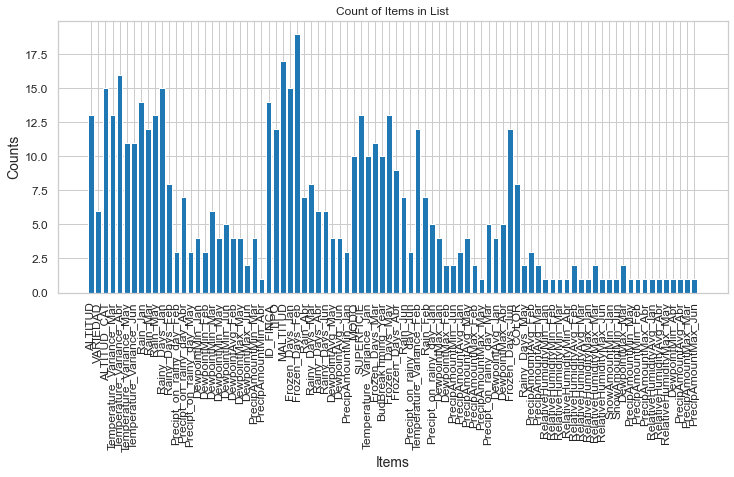

In [107]:
from collections import Counter
coef_name_counter = Counter(ceofs_list)

#print(coef_name_counter)

counts = list(coef_name_counter.values())
items = list(coef_name_counter.keys())

# create a bar plot
plt.bar(items, counts)

# set labels and title
plt.xlabel('Items')
plt.ylabel('Counts')
plt.title('Count of Items in List')

plt.xticks(rotation=90)

# display the plot
plt.show()

#### Selección de las variables con mayor participación entre los diferentes DataFrames y mayor relación entre ellos

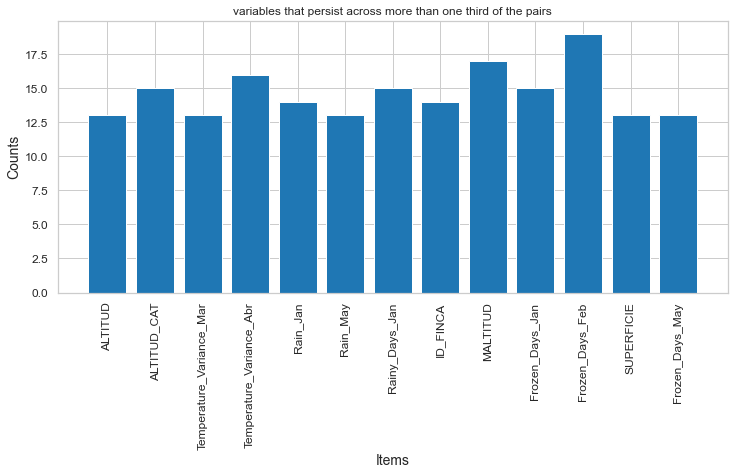

In [108]:
counts_filtered = [count for count in counts if count > len(all_coefficients)/3] #variables that persist across more than half of the variedad x altitud pairs
items_filtered = [item for item, count in coef_name_counter.items() if count > len(all_coefficients)/3]

# create a bar plot
plt.bar(items_filtered, counts_filtered)

# set labels and title
plt.xlabel('Items')
plt.ylabel('Counts')
plt.title('variables that persist across more than one third of the pairs')

plt.xticks(rotation=90)

# display the plot
plt.show()

In [109]:
items_filtered

['ALTITUD',
 'ALTITUD_CAT',
 'Temperature_Variance_Mar',
 'Temperature_Variance_Abr',
 'Rain_Jan',
 'Rain_May',
 'Rainy_Days_Jan',
 'ID_FINCA',
 'MALTITUD',
 'Frozen_Days_Jan',
 'Frozen_Days_Feb',
 'SUPERFICIE',
 'Frozen_Days_May']

# 3. METEO

* Se revisó las variables de METEO; sin embargo se decidió considerar el dataset ETO por la agregación a nivel día y la selección de ciertos features ya calculados
* Se analizó también la cantidad de NaN que tenía y el tiempo que tomaba en agregar a nivel día y mes.

### Análisis del dataset UH_2023_TRAIN por FINCA, VARIEDAD, TIPO, MODO

* Se hizo un análisis adicional para saber las fincas de acuerdo a un VARIEDAD-TIPO-MODO a través de los años para tomarlas de forma independiente a la finca
* Se concluye que no afecta tanto los resultados finales del modelo por lo que no se considero dentro del script final, ya que se borran datos que eran necesarios para la predicción
* Como analisis adicional esta evaluación puede tomarse como vectores para cada finca por campaña similar al metodo (bag of word) y buscar distancias similares tanto entre fincas a través de las campañas como entre zonas y estación

<AxesSubplot:>

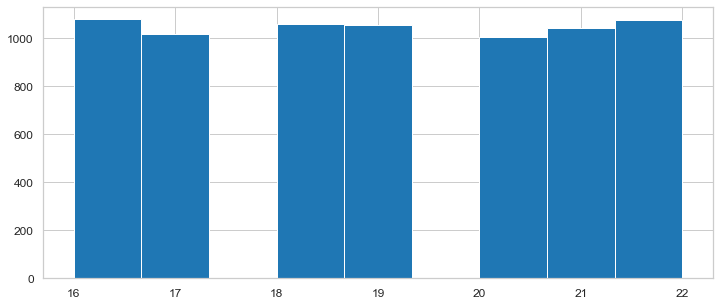

In [110]:
data.CAMPAÑA.hist(bins=9)

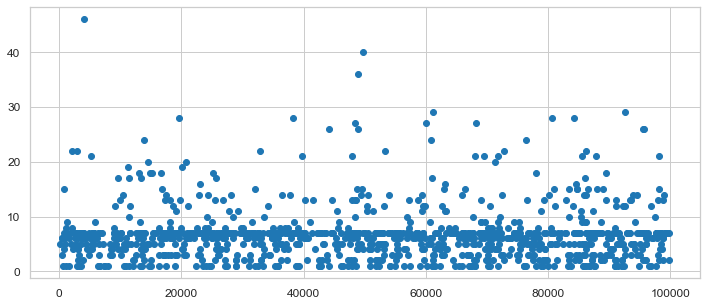

In [111]:
plt.scatter(data.ID_FINCA.value_counts().index, data.ID_FINCA.value_counts().values)

In [112]:
data.reset_index(inplace=True)

  0%|          | 0/5 [00:00<?, ?it/s]

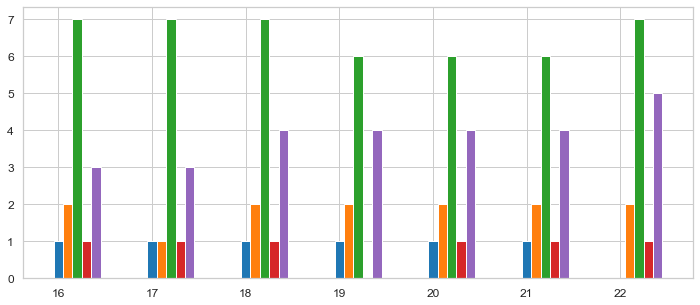

In [113]:
# Para probar y revisar
df = data.ID_FINCA.unique()[5:10]
bar_len = len(df)
with tqdm(total=bar_len) as pbar:    
    for index, finca in enumerate(df):    
        counts = data[data.ID_FINCA.isin([finca])].groupby(
            ["ID_FINCA", "CAMPAÑA"]
        ).count().reset_index().sort_values(
            by=["ID_FINCA", "CAMPAÑA", "index"]
        ).pivot(
            index='CAMPAÑA', columns='ID_FINCA', values='index'
        )
        
        plt.bar(counts.index+(.1*index), height=counts[finca], width=0.1)
        pbar.update((index%bar_len)+1)

In [114]:
# "ID_FINCA","VARIEDAD","MODO","TIPO","COLOR" 
# test 1 - añadir ID_FINCA - 
# test 2 - añadir ID_ZONA/ID_ESTACION
data['COMBINED_KEY'] = data['VARIEDAD']*1000 + data['MODO']*100 + data['TIPO']*10 + data['COLOR']

<AxesSubplot:>

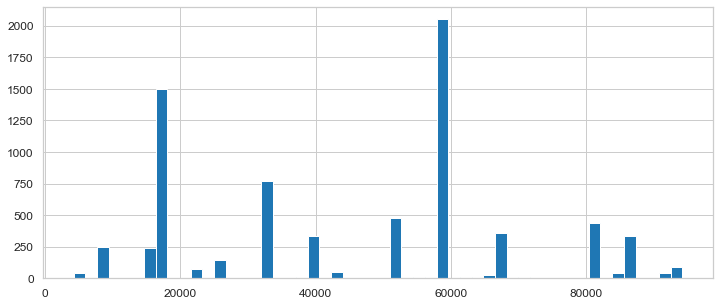

In [115]:
data['COMBINED_KEY'].hist(bins=data['COMBINED_KEY'].unique().shape[0])

In [126]:
counts = data[data.ID_FINCA.isin([98814])].groupby(
    ['ID_FINCA', 'CAMPAÑA', 'COMBINED_KEY']
).count().reset_index().sort_values(
    by=['CAMPAÑA', 'COMBINED_KEY']
).pivot(
    index='CAMPAÑA', columns='COMBINED_KEY', values='index'
)

In [127]:
counts

COMBINED_KEY,32201,40201
CAMPAÑA,,
16,1.0,1.0
17,NaN,1.0
18,1.0,1.0
19,1.0,1.0
20,1.0,1.0
21,1.0,1.0
22,1.0,1.0


In [117]:
to_remove = counts.columns[counts.sum() < 2]
to_remove

Int64Index([81201, 87100], dtype='int64', name='COMBINED_KEY')

In [118]:
removed_keys = to_remove.values.tolist()

In [119]:
removed_index = [(key, counts[~counts[key].isna()].index[0]) for key in removed_keys if counts[~counts[key].isna()].index[0] != 22]

In [120]:
removed = []
# Para probar y revisar
df = data.ID_FINCA.unique()
bar_len = len(df)

for finca in tqdm(df):
    counts = data[data.ID_FINCA.isin([finca])].groupby(
        ['ID_FINCA', 'CAMPAÑA', 'COMBINED_KEY']
    ).count().reset_index().sort_values(
        by=['CAMPAÑA', 'COMBINED_KEY']
    ).pivot(
        index='CAMPAÑA', columns='COMBINED_KEY', values='index'
    )

    to_remove = counts.columns[counts.sum() < 2]
    if to_remove.shape[0] > 0:
        removed_index = [(key, counts[~counts[key].isna()].index[0]) for key in to_remove.values.tolist() if counts[~counts[key].isna()].index[0] != 22]
        if len(removed_index) > 0:
            removed.append(data[(data.ID_FINCA == finca) & (data.CAMPAÑA == removed_index[0][1]) & (data.COMBINED_KEY == removed_index[0][0])].index[0])  

  0%|          | 0/1097 [00:00<?, ?it/s]

In [121]:
len(removed)

214

In [122]:
data.loc[removed][data.CAMPAÑA == 21]

C:\Users\Anderson\AppData\Local\Temp\ipykernel_10276\515046337.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.loc[removed][data.CAMPAÑA == 21]


,index,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION,MALTITUD,ALTITUD_CAT,BudBreakTiming_Year,Temperature_Variance_Jan,Temperature_Variance_Feb,Temperature_Variance_Mar,Temperature_Variance_Abr,Temperature_Variance_May,Temperature_Variance_Jun,Frozen_Days_Jan,Frozen_Days_Feb,Frozen_Days_Mar,Frozen_Days_Abr,Frozen_Days_May,Frozen_Days_Jun,Rain_Jan,Rain_Feb,Rain_Mar,Rain_Abr,Rain_May,Rain_Jun,Rainy_Days_Jan,Rainy_Days_Feb,Rainy_Days_Mar,Rainy_Days_Abr,Rainy_Days_May,Rainy_Days_Jun,Precipt_on_rainy_day_Jan,Precipt_on_rainy_day_Feb,Precipt_on_rainy_day_Mar,Precipt_on_rainy_day_Abr,Precipt_on_rainy_day_May,Precipt_on_rainy_day_Jun,DewpointMin_Jan,DewpointMin_Feb,DewpointMin_Mar,DewpointMin_Abr,DewpointMin_May,DewpointMin_Jun,DewpointAvg_Jan,DewpointAvg_Feb,DewpointAvg_Mar,DewpointAvg_Abr,DewpointAvg_May,DewpointAvg_Jun,DewpointMax_Jan,DewpointMax_Feb,DewpointMax_Mar,DewpointMax_Abr,DewpointMax_May,DewpointMax_Jun,PrecipAmountMin_Jan,PrecipAmountMin_Feb,PrecipAmountMin_Mar,PrecipAmountMin_Abr,PrecipAmountMin_May,PrecipAmountMin_Jun,PrecipAmountAvg_Jan,PrecipAmountAvg_Feb,PrecipAmountAvg_Mar,PrecipAmountAvg_Abr,PrecipAmountAvg_May,PrecipAmountAvg_Jun,PrecipAmountMax_Jan,PrecipAmountMax_Feb,PrecipAmountMax_Mar,PrecipAmountMax_Abr,PrecipAmountMax_May,PrecipAmountMax_Jun,RelativeHumidityMin_Jan,RelativeHumidityMin_Feb,RelativeHumidityMin_Mar,RelativeHumidityMin_Abr,RelativeHumidityMin_May,RelativeHumidityMin_Jun,RelativeHumidityAvg_Jan,RelativeHumidityAvg_Feb,RelativeHumidityAvg_Mar,RelativeHumidityAvg_Abr,RelativeHumidityAvg_May,RelativeHumidityAvg_Jun,RelativeHumidityMax_Jan,RelativeHumidityMax_Feb,RelativeHumidityMax_Mar,RelativeHumidityMax_Abr,RelativeHumidityMax_May,RelativeHumidityMax_Jun,SnowAmountMin_Jan,SnowAmountMin_Feb,SnowAmountMin_Mar,SnowAmountMin_Abr,SnowAmountMin_May,SnowAmountMin_Jun,SnowAmountAvg_Jan,SnowAmountAvg_Feb,SnowAmountAvg_Mar,SnowAmountAvg_Abr,SnowAmountAvg_May,SnowAmountAvg_Jun,SnowAmountMax_Jan,SnowAmountMax_Feb,SnowAmountMax_Mar,SnowAmountMax_Abr,SnowAmountMax_May,SnowAmountMax_Jun,TemperatureMin_Jan,TemperatureMin_Feb,TemperatureMin_Mar,TemperatureMin_Abr,TemperatureMin_May,TemperatureMin_Jun,TemperatureAvg_Jan,TemperatureAvg_Feb,TemperatureAvg_Mar,TemperatureAvg_Abr,TemperatureAvg_May,TemperatureAvg_Jun,TemperatureMax_Jan,TemperatureMax_Feb,TemperatureMax_Mar,TemperatureMax_Abr,TemperatureMax_May,TemperatureMax_Jun,UVIndexMin_Jan,UVIndexMin_Feb,UVIndexMin_Mar,UVIndexMin_Abr,UVIndexMin_May,UVIndexMin_Jun,UVIndexAvg_Jan,UVIndexAvg_Feb,UVIndexAvg_Mar,UVIndexAvg_Abr,UVIndexAvg_May,UVIndexAvg_Jun,UVIndexMax_Jan,UVIndexMax_Feb,UVIndexMax_Mar,UVIndexMax_Abr,UVIndexMax_May,UVIndexMax_Jun,VisibilityMin_Jan,VisibilityMin_Feb,VisibilityMin_Mar,VisibilityMin_Abr,VisibilityMin_May,VisibilityMin_Jun,VisibilityAvg_Jan,VisibilityAvg_Feb,VisibilityAvg_Mar,VisibilityAvg_Abr,VisibilityAvg_May,VisibilityAvg_Jun,VisibilityMax_Jan,VisibilityMax_Feb,VisibilityMax_Mar,VisibilityMax_Abr,VisibilityMax_May,VisibilityMax_Jun,WindSpeedMin_Jan,WindSpeedMin_Feb,WindSpeedMin_Mar,WindSpeedMin_Abr,WindSpeedMin_May,WindSpeedMin_Jun,WindSpeedAvg_Jan,WindSpeedAvg_Feb,WindSpeedAvg_Mar,WindSpeedAvg_Abr,WindSpeedAvg_May,WindSpeedAvg_Jun,WindSpeedMax_Jan,WindSpeedMax_Feb,WindSpeedMax_Mar,WindSpeedMax_Abr,WindSpeedMax_May,WindSpeedMax_Jun,consecutive_days_without_rain_Jan,consecutive_days_without_rain_Feb,consecutive_days_without_rain_Mar,consecutive_days_without_rain_Abr,consecutive_days_without_rain_May,consecutive_days_without_rain_Jun,TemperatureDifferenceAvg_Jan,TemperatureDifferenceAvg_Feb,TemperatureDifferenceAvg_Mar,TemperatureDifferenceAvg_Abr,TemperatureDifferenceAvg_May,TemperatureDifferenceAvg_Jun,Temperature_Variance_Reposo,Frozen_Days_Reposo,Rain_Reposo,Rainy_Days_Reposo,Precipt_on_rainy_day_Reposo,DewpointMin_Reposo,DewpointAvg_Reposo,DewpointMax_Reposo,PrecipAmountMin_Reposo,PrecipAmountAvg_Reposo,PrecipAmountMax_Reposo,RelativeHumidityMin_Reposo,RelativeHumidityAvg_Reposo,RelativeHum